Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
# Import necessary Libraries:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Get statistic visualization of data set 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Insights:
All dataset are in numerical formate.
13 Features are in integer datatype and 1 feature in float datatype.

In [6]:
# Finding the missing values:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Insights:
    There is no null value in the dataset.

<AxesSubplot: >

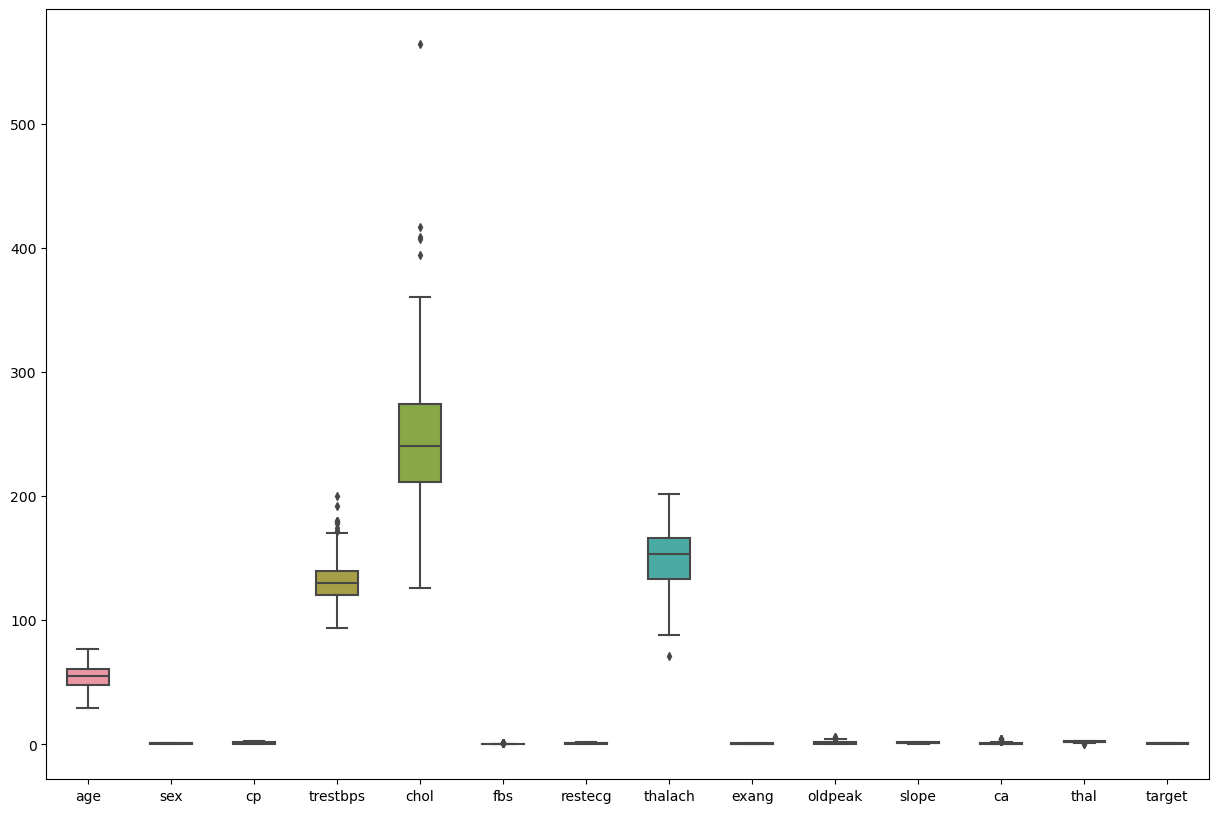

In [7]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax,fliersize=4)

 Insights in the data set here is some outlier are present.

In [8]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Observation: 
    
 It is a binary classification problem.

In [9]:
# Segregate the Dependent and Independent variable
X = data.drop(columns=['target'])
y = data['target']

In [10]:
# Separate dataset into train and test :
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.30,random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [12]:
from sklearn.impute import SimpleImputer # Handling missing values
from sklearn.preprocessing import StandardScaler # FEature scaling 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [13]:
# Feature engineering Automation
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')), #missing values
        ('scaler',StandardScaler()) # feature scaling
    ]
)

In [14]:
numerical_cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [15]:
preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols)])

In [16]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score

In [18]:
model= RandomForestClassifier(n_estimators=100,
    max_depth=10)

In [19]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [20]:
y_test_pred = model.predict(X_test)

In [21]:
test_model_score = accuracy_score(y_test,y_test_pred)

In [22]:
test_model_score

0.7912087912087912

In [23]:
conf_mat = confusion_matrix(y_test,y_test_pred)

In [24]:
conf_mat

array([[32,  9],
       [10, 40]])

In [25]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [26]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7912087912087912

In [27]:
Precision_score = precision_score(y_test,y_test_pred)
Precision_score

0.8163265306122449

In [28]:
Recall = recall_score(y_test,y_test_pred)
Recall

0.8

In [29]:
F1_score = f1_score(y_test,y_test_pred)
F1_score

0.8080808080808082

In [30]:
# Get feature importances
feature_importances = model.feature_importances_

In [31]:
feature_importances

array([0.08523816, 0.02831944, 0.11054109, 0.07545102, 0.0716212 ,
       0.00914889, 0.01867531, 0.10274815, 0.06271383, 0.10571896,
       0.05168402, 0.15789264, 0.12024729])

In [32]:
# Get indices of top 5 features
top_indices = np.argsort(feature_importances)[::-1][:5]

In [33]:
top_indices

array([11, 12,  2,  9,  7])

In [34]:
feature_names= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# Get top 5 feature names
top_feature_names = [feature_names[i] for i in top_indices]  # Assuming feature_names is a list of feature names

In [35]:
print("The top 5 important features are :",top_feature_names)

The top 5 important features are : ['ca', 'thal', 'cp', 'oldpeak', 'thalach']


In [36]:
# Get top 5 feature importances
top_feature_importances = feature_importances[top_indices]

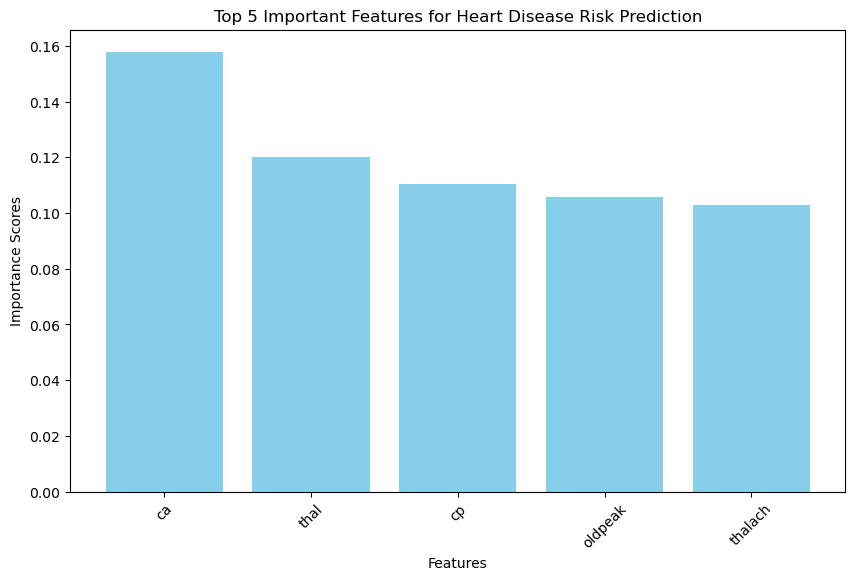

In [37]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Top 5 Important Features for Heart Disease Risk Prediction')
plt.xticks(rotation=45)
plt.show()

In [38]:
#hyperparameter tunning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier()

In [40]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]})

In [42]:
# Perform random search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]})

In [43]:
# Print the best hyperparameters found
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [44]:
from sklearn.metrics import classification_report

In [45]:
# Get the best model from random search
best_rf_classifier = random_search.best_estimator_

In [46]:
# Evaluate the best model using test data
y_pred = best_rf_classifier.predict(X_test)

In [47]:
# Report performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [48]:
# Compare with default model
default_rf_classifier = RandomForestClassifier()  # Default parameters
default_rf_classifier.fit(X_train, y_train)
y_pred_default = default_rf_classifier.predict(X_test)
print("Default Model Performance:")
print(classification_report(y_test, y_pred_default))

Default Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [49]:
# Extract the top 2 features from X_train
X_top_features = X_train[:, top_indices[:2]]

In [50]:
# Train a RandomForest classifier on the top 2 features
rf_classifier_top_features = RandomForestClassifier()
rf_classifier_top_features.fit(X_top_features, y_train)

RandomForestClassifier()

In [51]:
# Create a meshgrid for decision boundary visualization
x_min, x_max = X_top_features[:, 0].min() - 1, X_top_features[:, 0].max() + 1
y_min, y_max = X_top_features[:, 1].min() - 1, X_top_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [52]:
# Make predictions on the meshgrid
Z = rf_classifier_top_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

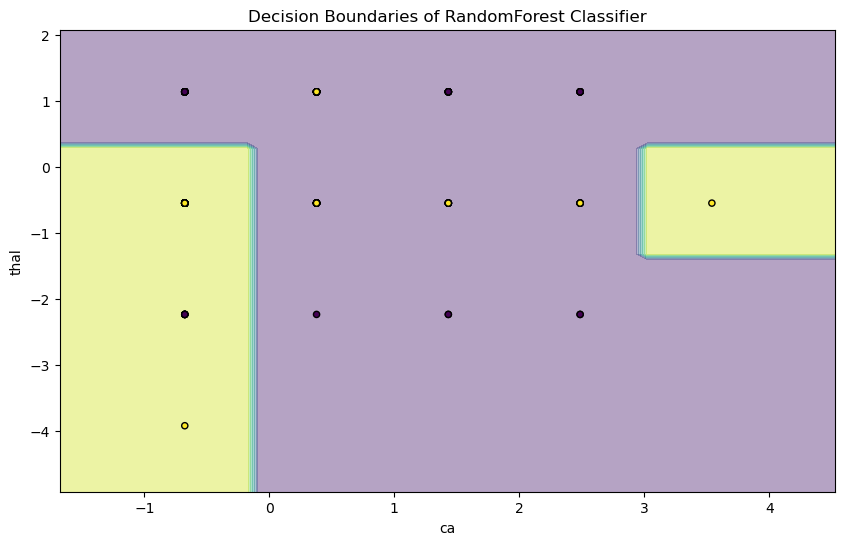

In [53]:
# Plot decision boundaries and scatter plot of data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_top_features[:, 0], X_top_features[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel(top_feature_names[0])
plt.ylabel(top_feature_names[1])
plt.title('Decision Boundaries of RandomForest Classifier')
plt.show()